In [1]:
import sys
sys.path.append('../')
import torch
from builders import model_builder
from torchvision import transforms
from PIL import Image
import utils

default logger


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
H = 256
W = 128
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Test time augmentation would give +1.5%

transform = transforms.Compose([
    transforms.Resize((H, W)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

In [42]:
model_cfg, _, _ = utils.restore_checkpoint('/globalwork/pfeiffer/weights/model_v1.pth', map_location='cpu')

Setting weights from /globalwork/pfeiffer/weights/model_v1.pth.


In [43]:
model = model_builder.build(model_cfg)

num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels_per_group:16
num_channels

In [32]:
model = model.eval()
# optionally, put model on cuda
# model = model.cuda()

In [9]:
%matplotlib inline

In [20]:
import os

In [22]:
import numpy as np

In [25]:
base_dir = '/globalwork/data/market1501/bounding_box_test/'
test_images = os.listdir(base_dir)

/globalwork/data/market1501/bounding_box_test/0916_c6s2_107993_01.jpg


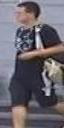

In [38]:
test_path = os.path.join(base_dir, test_images[np.random.randint(0, len(test_images))])
print(test_path)
image = Image.open(test_path)
image

In [39]:
tensor = transform(image).unsqueeze(0) # add batch dim

In [33]:
# if model is on cuda --> move tensor to cuda
# tensor = tensor.cuda()

In [40]:
endpoints = model.infere({'img': tensor})

In [41]:
emb = endpoints['emb']
emb

tensor([[1.9301, 2.7547, 0.3917,  ..., 1.7827, 1.2871, 0.1364]])